1. 准备数据
2. 计算预测值
3. 计算损失
4. 更新参数

In [79]:
import torch

In [80]:
x = torch.rand([50])
y = 3 * x + 0.8

In [81]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [82]:
def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).mean()
    for i in [w, b]:
        # 每次传播前梯度设置为0
        if i.grad is not None:
            i.grad.data.zero_()
    loss.backward()
    return loss

In [83]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

0 tensor(2.3080, grad_fn=<MeanBackward0>)
500 tensor(0.0954, grad_fn=<MeanBackward0>)
1000 tensor(0.0351, grad_fn=<MeanBackward0>)
1500 tensor(0.0129, grad_fn=<MeanBackward0>)
2000 tensor(0.0047, grad_fn=<MeanBackward0>)
2500 tensor(0.0017, grad_fn=<MeanBackward0>)


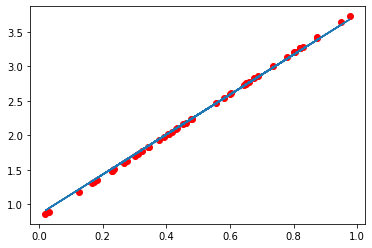

w tensor([2.8998], requires_grad=True)
b tensor([0.8526], requires_grad=True)


In [84]:
for i in range(3000):
    # 计算预测值
    y_pred = w * x + b

    # 计算损失
    loss = loss_fn(y, y_pred)

    if i % 500 == 0:
        print(i, loss)

    #更新参数
    optimize(0.01)

from matplotlib import pyplot as plt
import numpy as np
predict = x * w + b

plt.scatter(x.data.numpy(),y.data.numpy(),c="r")
plt.plot(x.data.numpy(),predict.data.numpy())
plt.show()

print("w",w)
print("b",b)